In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from skopt.space import Categorical, Real
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


# **Handling Missing Values**

In [8]:
df.drop([3,339], inplace=True)
df.shape

(342, 7)

In [9]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [10]:
Species = df['species'].value_counts()
Species

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [11]:
for col in df.columns:
    print(f"{col} Data has :", df[col].unique(), "\n")

species Data has : ['Adelie' 'Chinstrap' 'Gentoo'] 

island Data has : ['Torgersen' 'Biscoe' 'Dream'] 

culmen_length_mm Data has : [39.1 39.5 40.3 36.7 39.3 38.9 39.2 34.1 42.  37.8 41.1 38.6 34.6 36.6
 38.7 42.5 34.4 46.  37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9
 36.4 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 37.5 42.3 40.1 35.
 34.5 41.4 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1
 42.9 35.1 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2
 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2
 46.1 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6
 46.7 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5
 50.8 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8
 43.5 49.6 48.7 43.3 48.4 45.1 46.3 44.5 47.8 48.2 47.3 59.6 49.1 42.6
 44.4 44.  45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.4
 43.4 52.1 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9] 

culmen_depth_mm Data has : [18.7 1

In [12]:
df.dropna(axis = 0, inplace = True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [13]:
df = df[df['sex'] != '.']
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [14]:
ColPal = sns.crayon_palette(['Red', 'Yellow', 'Blue'])

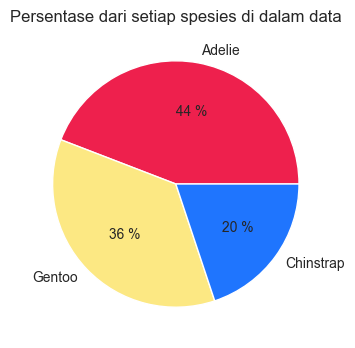

In [15]:
fig, ax = plt.subplots(figsize=(4,4))
plt.pie(Species, colors=ColPal, autopct = '% 1.f %%', labels=['Adelie','Gentoo','Chinstrap'])
plt.title("Persentase dari setiap spesies di dalam data")
plt.show()

[Text(0, 0, '168'), Text(0, 0, '165')]

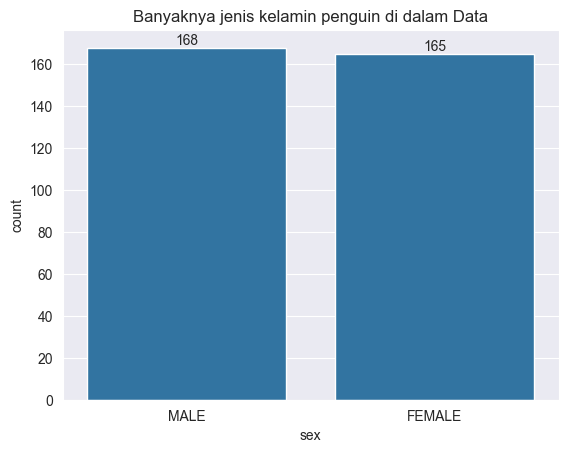

In [16]:
ax = sns.countplot(x=df['sex'])
ax.set_title("Banyaknya jenis kelamin penguin di dalam Data")
ax.bar_label(container=ax.containers[0], labels=df['sex'].value_counts())

Text(0.5, 1.0, 'Jenis Kelamin penguin berdasarkan spesies')

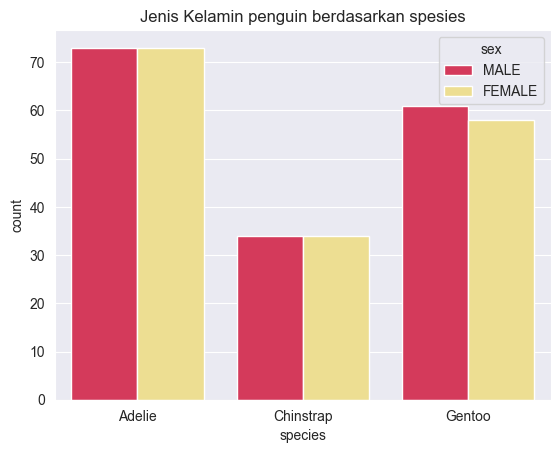

In [17]:
sns.countplot(hue=df['sex'], x=df['species'], palette = ColPal)
plt.title('Jenis Kelamin penguin berdasarkan spesies')

In [18]:
df['sex'].groupby(df['species']).value_counts()

species    sex   
Adelie     FEMALE    73
           MALE      73
Chinstrap  FEMALE    34
           MALE      34
Gentoo     MALE      61
           FEMALE    58
Name: count, dtype: int64

In [19]:
df['island'].groupby(df['species']).value_counts()

species    island   
Adelie     Dream         55
           Torgersen     47
           Biscoe        44
Chinstrap  Dream         68
Gentoo     Biscoe       119
Name: count, dtype: int64

Text(0.5, 1.0, 'Tempat tinggal Penguin berdasarkan spesies')

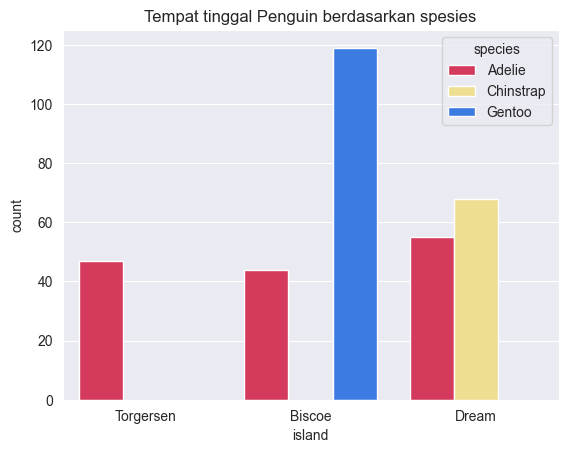

In [20]:
sns.countplot(x = df['island'], hue = df['species'], palette = ColPal)
plt.title('Tempat tinggal Penguin berdasarkan spesies')

Text(0.5, 1.0, 'Perbedaan Panjang Cullmen di spesies berdasarkan jenis kelamin')

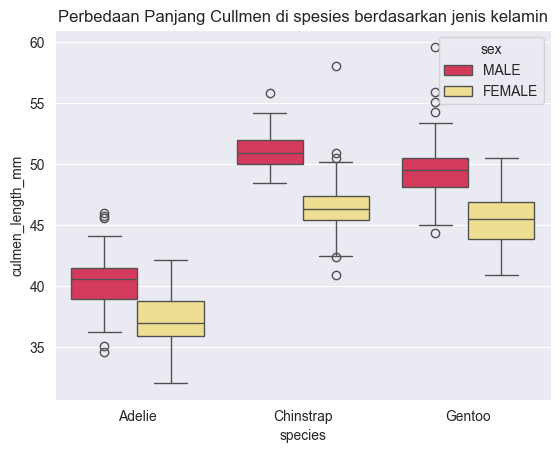

In [21]:
sns.boxplot(data=df, x='species', y='culmen_length_mm', hue='sex', palette = ColPal)
plt.title('Perbedaan Panjang Cullmen di spesies berdasarkan jenis kelamin')

In [22]:
df.groupby(['species','sex'])['culmen_length_mm'].describe()

count       mean       std   min     25%    50%     75%  \
species   sex                                                               
Adelie    FEMALE   73.0  37.257534  2.028883  32.1  35.900  37.00  38.800   
          MALE     73.0  40.390411  2.277131  34.6  39.000  40.60  41.500   
Chinstrap FEMALE   34.0  46.573529  3.108669  40.9  45.425  46.30  47.375   
          MALE     34.0  51.094118  1.564558  48.5  50.050  50.95  51.975   
Gentoo    FEMALE   58.0  45.563793  2.051247  40.9  43.850  45.50  46.875   
          MALE     61.0  49.473770  2.720594  44.4  48.100  49.50  50.500   

                   max  
species   sex           
Adelie    FEMALE  42.2  
          MALE    46.0  
Chinstrap FEMALE  58.0  
          MALE    55.8  
Gentoo    FEMALE  50.5  
          MALE    59.6

Text(0.5, 1.0, 'Perbandingan kedalaman culmen berdasarkan spesies dan jenis kelamin')

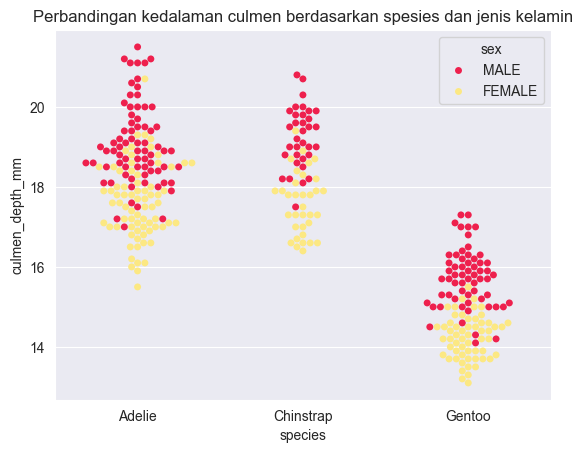

In [23]:
sns.swarmplot(data = df, x = 'species', y = 'culmen_depth_mm', hue = 'sex', palette = ColPal)
plt.title("Perbandingan kedalaman culmen berdasarkan spesies dan jenis kelamin")

In [24]:
df.groupby(['species','sex'])['culmen_depth_mm'].mean()

species    sex   
Adelie     FEMALE    17.621918
           MALE      19.072603
Chinstrap  FEMALE    17.588235
           MALE      19.252941
Gentoo     FEMALE    14.237931
           MALE      15.718033
Name: culmen_depth_mm, dtype: float64

Text(0.5, 1.0, 'Membandingkan panjang sirip berdasarkan spesies dan pulau')

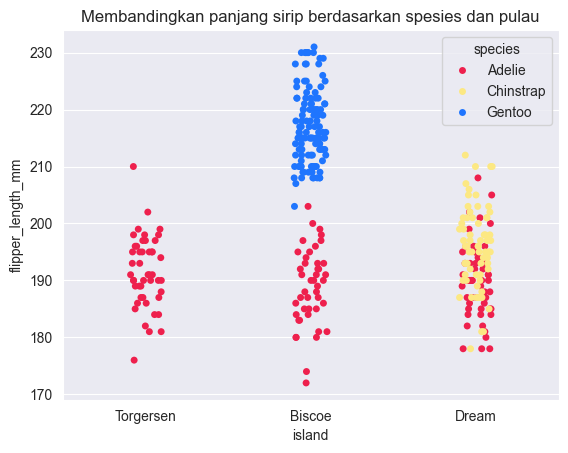

In [25]:
sns.stripplot(data = df, y = 'flipper_length_mm', x = 'island', hue = 'species', palette = ColPal)
plt.title("Membandingkan panjang sirip berdasarkan spesies dan pulau")  

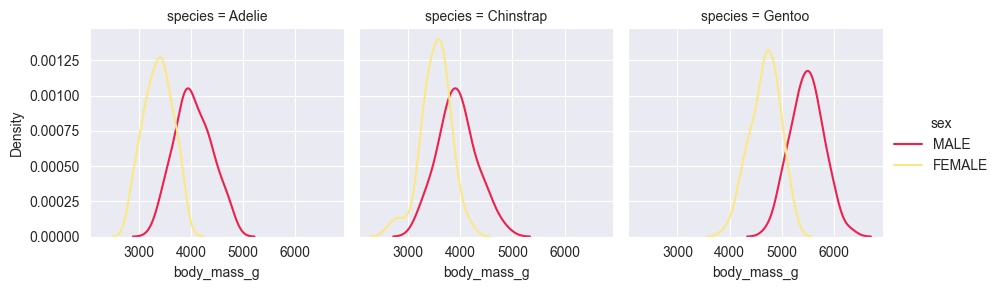

In [26]:
g = sns.FacetGrid(df, col="species", hue="sex", palette = ColPal)
g.map_dataframe(sns.kdeplot, x="body_mass_g")
g.add_legend()

In [27]:
df.groupby(['species','sex'])["body_mass_g"].describe()

count         mean         std     min      25%     50%  \
species   sex                                                               
Adelie    FEMALE   73.0  3368.835616  269.380102  2850.0  3175.00  3400.0   
          MALE     73.0  4043.493151  346.811553  3325.0  3800.00  4000.0   
Chinstrap FEMALE   34.0  3527.205882  285.333912  2700.0  3362.50  3550.0   
          MALE     34.0  3938.970588  362.137550  3250.0  3731.25  3950.0   
Gentoo    FEMALE   58.0  4679.741379  281.578294  3950.0  4462.50  4700.0   
          MALE     61.0  5484.836066  313.158596  4750.0  5300.00  5500.0   

                      75%     max  
species   sex                      
Adelie    FEMALE  3550.00  3900.0  
          MALE    4300.00  4775.0  
Chinstrap FEMALE  3693.75  4150.0  
          MALE    4100.00  4800.0  
Gentoo    FEMALE  4875.00  5200.0  
          MALE    5700.00  6300.0

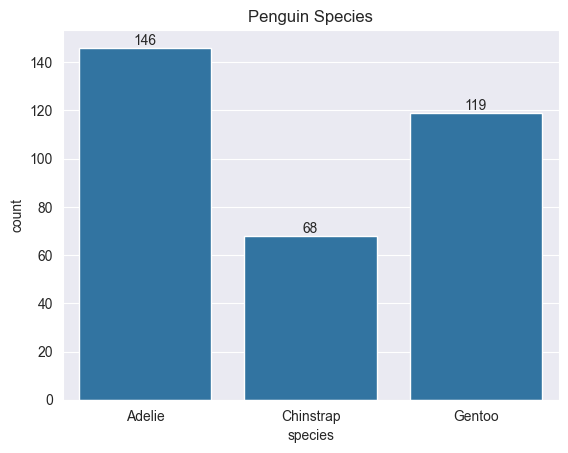

In [28]:
ax = sns.countplot(data=df, x="species")
ax.bar_label(ax.containers[0])
ax.set(title="Penguin Species")
plt.show()

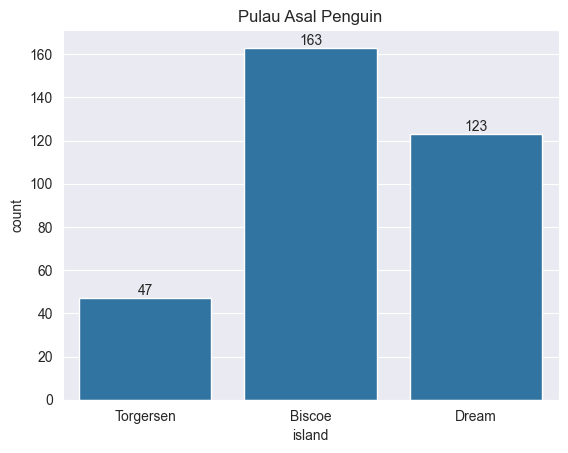

In [29]:
ax = sns.countplot(data=df, x="island")
ax.bar_label(ax.containers[0])
ax.set(title="Pulau Asal Penguin")
plt.show()

In [30]:
new_df = df.copy()
new_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [31]:
new_df = new_df.drop(['species', 'island'],axis=1)
new_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


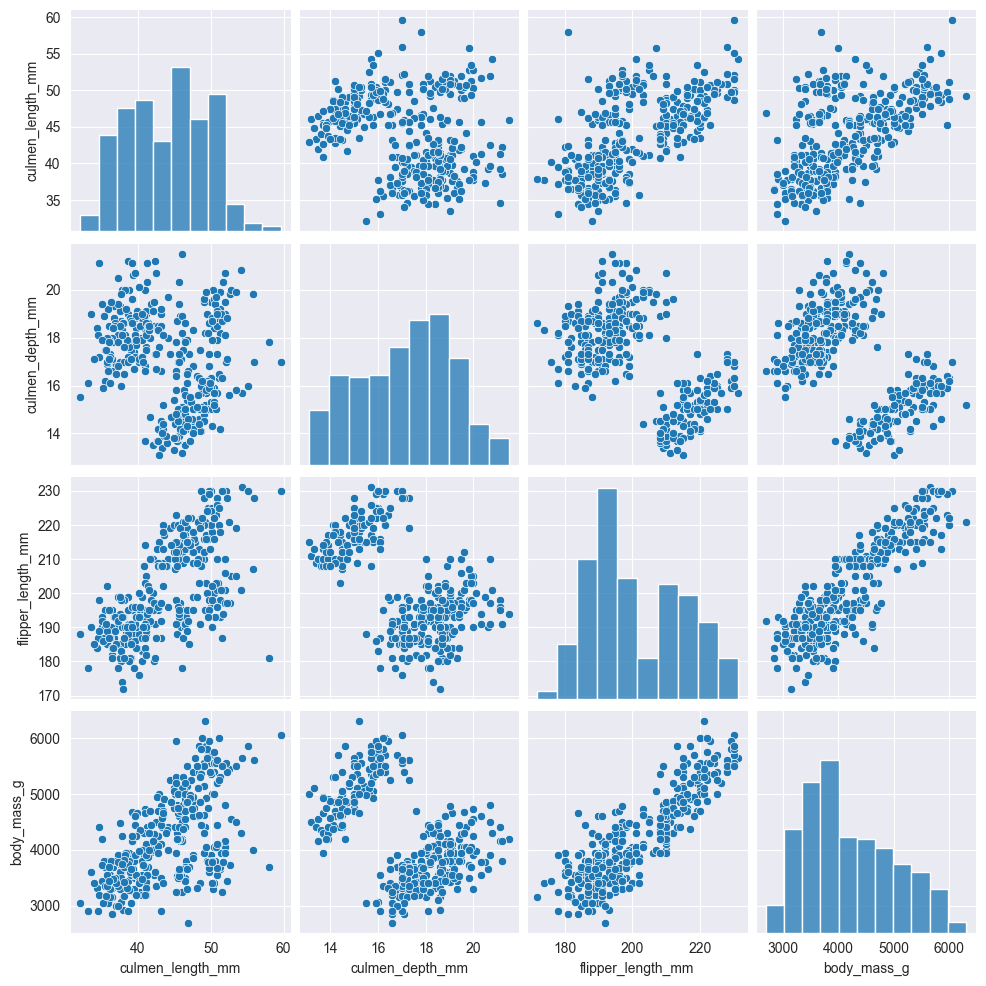

In [32]:
sns.pairplot(df)
plt.show()

# **Supervised Learning**

## **Cross-Validation**

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
from skopt import BayesSearchCV

In [34]:
k_fold = KFold(n_splits=10,shuffle=False)

In [35]:
train = new_df.drop('sex', axis = 1)
target = new_df['sex']
train.shape, target.shape

((333, 4), (333,))

In [36]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=42)

print("Bentuk data latih:", train_data.shape, train_target.shape)
print("Bentuk data uji:", test_data.shape, test_target.shape)


Bentuk data latih: (266, 4) (266,)
Bentuk data uji: (67, 4) (67,)


In [37]:
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)
test_target_encoded = label_encoder.fit_transform(test_target)

## **Random Forest Classifier**

In [161]:
param_grid = {
    'n_estimators': (25, 50),
    'max_features': ('sqrt', 'log2'),
    'max_depth': (3, 6),
    'max_leaf_nodes': (3, 6),
}


In [162]:
bayes_search = BayesSearchCV(RandomForestClassifier(),
                           search_spaces=param_grid)
bayes_search.fit(train_data, train_target)
print(bayes_search.best_params_)
print(bayes_search.best_score_)

OrderedDict([('max_depth', 5), ('max_features', 'log2'), ('max_leaf_nodes', 6), ('n_estimators', 37)])
0.9020265548567435


In [163]:
rf_model = RandomForestClassifier(max_depth=5,
                                  max_features='log2',
                                  max_leaf_nodes=6,
                                  n_estimators=37)

In [164]:
rf_predict = cross_val_predict(rf_model,
                               test_data,
                               test_target,
                               cv=k_fold,
                               n_jobs=5)

Confusion Matrix:
 [[32  5]
 [ 7 23]]


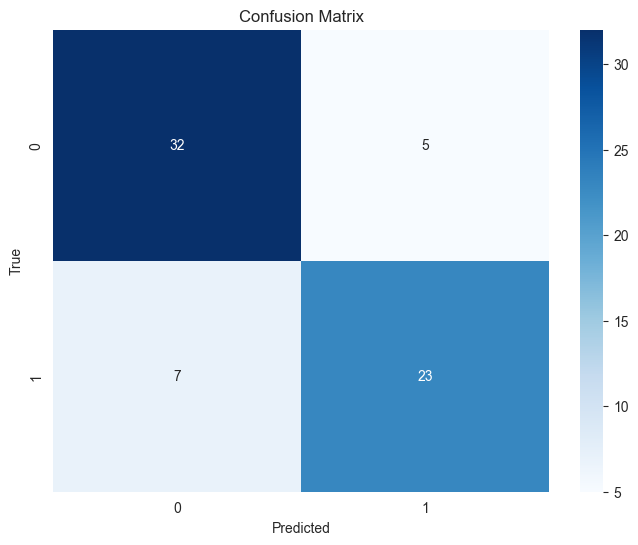

In [165]:
cm = confusion_matrix(test_target, rf_predict)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [166]:
print(classification_report(test_target,rf_predict))

              precision    recall  f1-score   support

      FEMALE       0.82      0.86      0.84        37
        MALE       0.82      0.77      0.79        30

    accuracy                           0.82        67
   macro avg       0.82      0.82      0.82        67
weighted avg       0.82      0.82      0.82        67


In [167]:
accuracy = accuracy_score(test_target, rf_predict)
print("Accuracy:", accuracy)

Accuracy: 0.8208955223880597


In [168]:
rf_model.fit(test_data, test_target_encoded)
rf_predict_proba = cross_val_predict(rf_model,
                                     test_data,
                                     test_target,
                                     cv=k_fold,
                                     method='predict_proba')

In [169]:
fpr, tpr, thresholds = roc_curve(test_target_encoded,
                                 rf_predict_proba[:, 1])
roc_auc = roc_auc_score(test_target_encoded,
                        rf_predict_proba[:, 1])

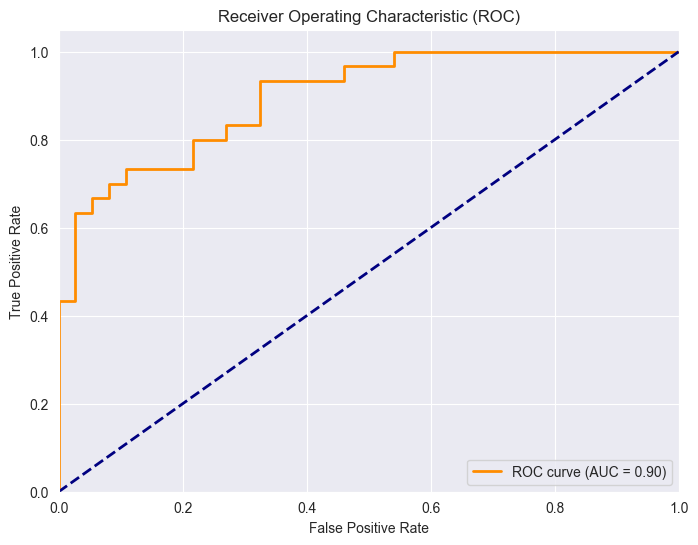

In [170]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## **Support Vector Classifier**

In [171]:
param_grid = {
    'C': Real(1e-6, 12+66),
    'gamma': Real(1e-6, 1e+6),
    'kernel': Categorical(['rbf'])
}


In [172]:
svc_model = SVC()
bayes_search = BayesSearchCV(estimator=svc_model,
                           search_spaces=param_grid,
                           cv=k_fold,
                           n_jobs=5,
                           scoring='accuracy')
bayes_search.fit(train_data, train_target)

BayesSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
              estimator=SVC(), n_jobs=5, scoring='accuracy',
              search_spaces={'C': Real(low=1e-06, high=78, prior='uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=1000000.0, prior='uniform', transform='normalize'),
                             'kernel': Categorical(categories=('rbf',), prior=None)})

In [173]:
print("Hyperparameter terbaik:", bayes_search.best_params_)
print("Akurasi terbaik:", bayes_search.best_score_)

Hyperparameter terbaik: OrderedDict([('C', 78.0), ('gamma', 1e-06), ('kernel', 'rbf')])
Akurasi terbaik: 0.7735042735042735


In [174]:
svc_model = SVC(C = 78, gamma=1e-06, kernel='rbf')

In [175]:
svc_predict = cross_val_predict(svc_model,
                                test_data,
                                test_target,
                                cv=k_fold,
                                n_jobs=5)

Confusion Matrix:
 [[30  7]
 [ 6 24]]


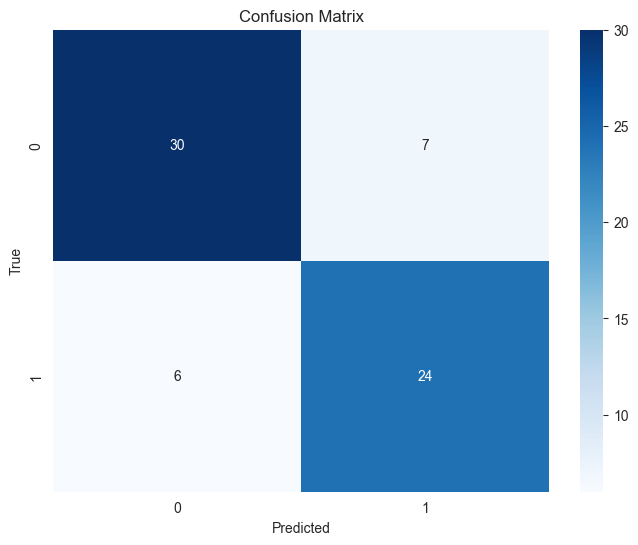

In [176]:
cm = confusion_matrix(test_target, svc_predict)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [177]:
print(classification_report(test_target, svc_predict))

              precision    recall  f1-score   support

      FEMALE       0.83      0.81      0.82        37
        MALE       0.77      0.80      0.79        30

    accuracy                           0.81        67
   macro avg       0.80      0.81      0.80        67
weighted avg       0.81      0.81      0.81        67


In [178]:
accuracy = accuracy_score(test_target, svc_predict)
print("Accuracy:", accuracy)

Accuracy: 0.8059701492537313


In [179]:
svc_model.fit(test_data,
              test_target)
svc_predict_proba = cross_val_predict(svc_model,
                                      test_data,
                                      test_target,
                                      cv=k_fold,
                                      method='decision_function')

In [180]:
fpr, tpr, thresholds = roc_curve(test_target_encoded, svc_predict_proba)
roc_auc = roc_auc_score(test_target_encoded, svc_predict_proba)


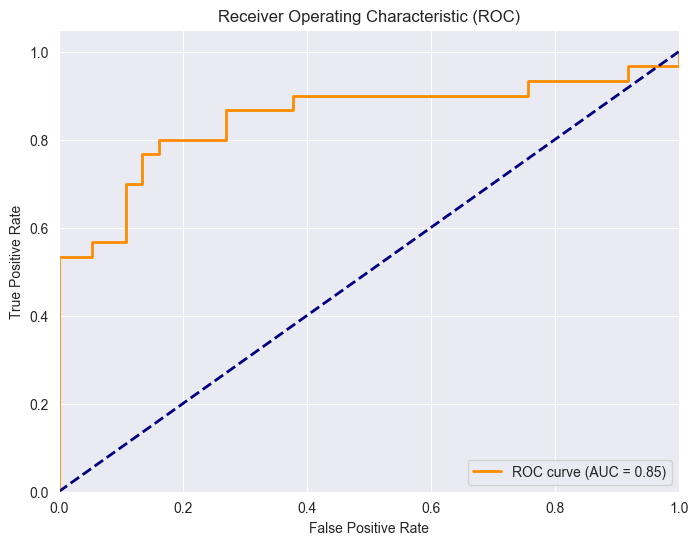

In [181]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **Naive Bayes**

In [33]:
from sklearn.naive_bayes import GaussianNB  
from skopt import BayesSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
model = GaussianNB()
param_grid ={'var_smoothing': np.logspace(0,-9, num=100)}
bayes_search = BayesSearchCV(estimator=model, cv=5, n_jobs=-1, search_spaces=param_grid)
bayes_search.fit(train, target)

NameError: name 'train' is not defined

In [460]:
print("Hyperparameter terbaik:", bayes_search.best_params_)
print("Akurasi terbaik:", bayes_search.best_score_)

Hyperparameter terbaik: OrderedDict([('var_smoothing', 2.848035868435805e-09)])
Akurasi terbaik: 0.6817277250113072


In [182]:
NB_model = GaussianNB(var_smoothing=2.848035868435805e-09)

In [183]:
NB_predict = cross_val_predict(NB_model,
                               test_data,
                               test_target,
                               cv=k_fold,
                               n_jobs=5)

Confusion Matrix:
 [[31  6]
 [12 18]]


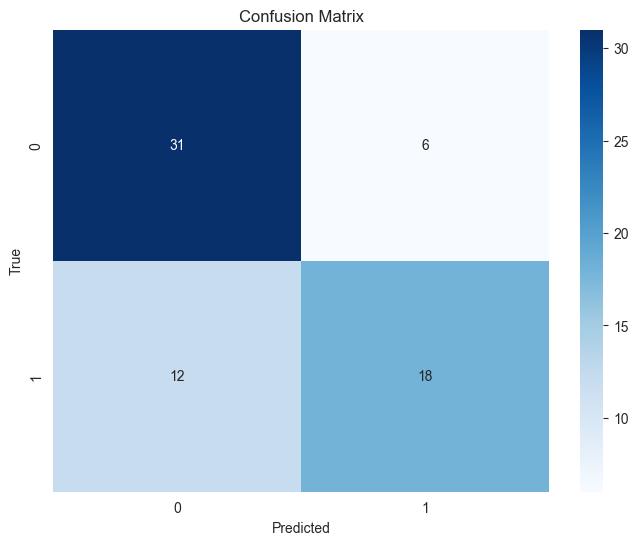

In [184]:
cm = confusion_matrix(test_target, NB_predict)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [185]:
print(classification_report(test_target, NB_predict))

              precision    recall  f1-score   support

      FEMALE       0.72      0.84      0.78        37
        MALE       0.75      0.60      0.67        30

    accuracy                           0.73        67
   macro avg       0.74      0.72      0.72        67
weighted avg       0.73      0.73      0.73        67


In [186]:
accuracy = accuracy_score(test_target, NB_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7313432835820896


In [74]:
NB_model.fit(test_data,
             test_target)
NB_predict_proba = cross_val_predict(NB_model,
                                     test_data,
                                     test_target,
                                     cv=k_fold,
                                     method='predict_proba')

In [75]:
fpr, tpr, thresholds = roc_curve(test_target_encoded, NB_predict_proba[:, 1])
roc_auc = roc_auc_score(test_target_encoded, NB_predict_proba[:, 1])

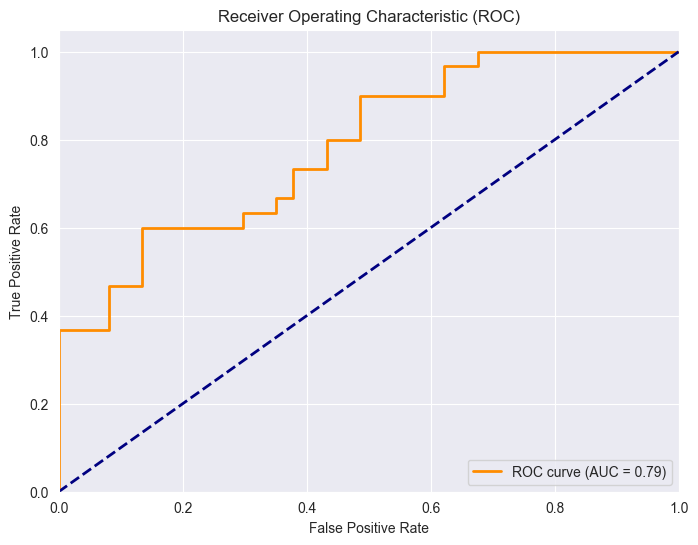

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **Artificial Neural Network**

In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputSpec
from sklearn.metrics import roc_auc_score, roc_curve

In [45]:
from tensorflow.python.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

In [108]:
ANN_model = Sequential([
    Dense(600, activation='relu'),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [109]:
from keras.src.optimizers import Adam

opt = Adam(learning_rate=0.001)
ANN_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [121]:
history = ANN_model.fit(test_data,
                        test_target_encoded,
                        epochs=150,
                        batch_size=32,
                        callbacks=[early_stopping],
                        validation_split=0.2)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.3913 - loss: 3.6106 - val_accuracy: 0.3571 - val_loss: 2.1200
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5731 - loss: 6.0040 - val_accuracy: 0.6429 - val_loss: 12.2003
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4204 - loss: 14.9815 - val_accuracy: 0.3571 - val_loss: 44.9676
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6004 - loss: 31.0869 - val_accuracy: 0.3571 - val_loss: 72.4930
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5796 - loss: 43.5429 - val_accuracy: 0.3571 - val_loss: 18.8667
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6443 - loss: 9.7394 - val_accuracy: 0.6429 - val_loss: 19.0461
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4100 - loss: 31.1209 - val_accuracy: 0.6429 - val_loss: 1.5545
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4980 - loss: 8.2425 - val_accuracy: 0.3571 -

In [122]:
predictions = ANN_model.predict(test_data)
predictions = (predictions > 0.5)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [123]:
cm = confusion_matrix(test_target_encoded, predictions)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[23 14]
 [ 7 23]]


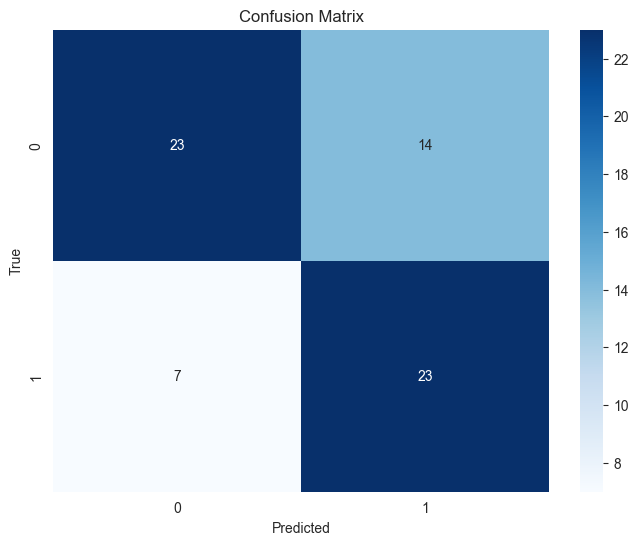

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [125]:
print(classification_report(test_target_encoded, predictions))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69        37
           1       0.62      0.77      0.69        30

    accuracy                           0.69        67
   macro avg       0.69      0.69      0.69        67
weighted avg       0.70      0.69      0.69        67


In [126]:
accuracy = accuracy_score(test_target_encoded, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6865671641791045


In [127]:
y_pred_proba = ANN_model.predict(test_data)
auc = roc_auc_score(test_target_encoded, y_pred_proba)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [128]:
fpr, tpr, thresholds = roc_curve(test_target_encoded, y_pred_proba)

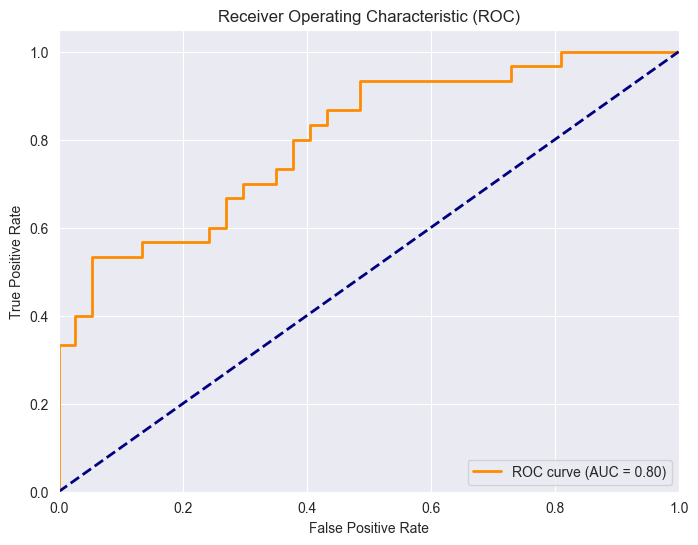

In [129]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()